Aluna: Karina Meireles Varela  -  kmv@cesar.school
2025.1

 Professor: Vitor Casadei

In [15]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [16]:
# Dataset:

df = pd.read_csv('/content/student_exam_data.csv')
df.head(10)

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0
5,2.403951,49.757016,0
6,1.522753,94.655631,0
7,8.795585,89.352235,1
8,6.410035,96.987995,1
9,7.372653,83.543171,1


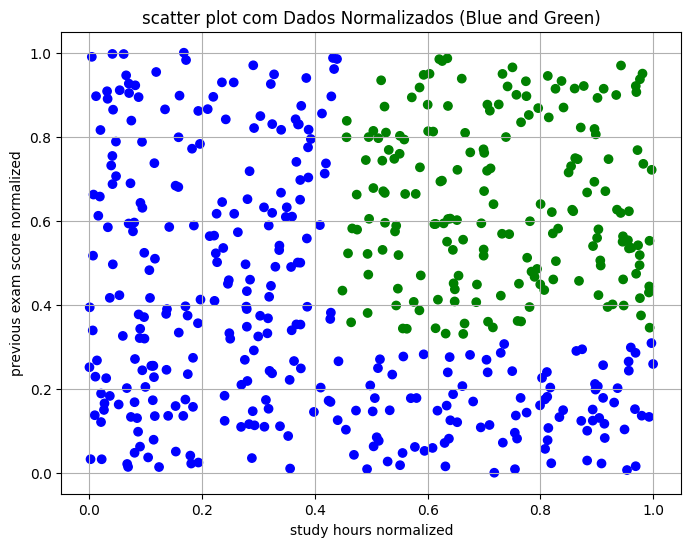

In [29]:

cols_to_norm = ['Study Hours', 'Previous Exam Score']
df_norm = df.copy()
df_norm[cols_to_norm] = (df_norm[cols_to_norm] - df_norm[cols_to_norm].min()) / (df_norm[cols_to_norm].max() - df_norm[cols_to_norm].min())


color_map = {
    0: 'blue',
    1: 'green',
    2: 'red'
}

colors = df_norm['Pass/Fail'].map(color_map)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df_norm['Study Hours'], df_norm['Previous Exam Score'], c=colors)

plt.xlabel('study hours normalized')
plt.ylabel('previous exam score normalized')
plt.title('scatter plot com Dados Normalizados (Blue and Green)')
plt.grid(True)
plt.show()


In [18]:
import torch


x_tensor = torch.FloatTensor(df_norm[['Study Hours', 'Previous Exam Score']].values)
y_tensor = torch.LongTensor(df_norm['Pass/Fail'].values)

In [19]:
y_tensor

tensor([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,

In [20]:
import torch.nn as nn



model = nn.Linear(2,3)
model.state_dict()

OrderedDict([('weight',
              tensor([[ 0.4973, -0.3978],
                      [ 0.2705, -0.3656],
                      [-0.0451, -0.3222]])),
             ('bias', tensor([-0.5576,  0.5001, -0.1777]))])

In [21]:


out = model(x_tensor[:10,:])
out

tensor([[-0.6489,  0.3465, -0.4191],
        [-0.2941,  0.5638, -0.3929],
        [-0.3136,  0.5871, -0.3096],
        [-0.5823,  0.3654, -0.4667],
        [-0.7536,  0.2916, -0.4047],
        [-0.5448,  0.4834, -0.2357],
        [-0.8933,  0.1817, -0.4735],
        [-0.4512,  0.4354, -0.4818],
        [-0.6355,  0.3161, -0.5109],
        [-0.4920,  0.4277, -0.4432]], grad_fn=<AddmmBackward0>)

In [22]:
import torch.nn.functional as F
oo = F.softmax(out,dim=1)
oo

tensor([[0.2014, 0.5451, 0.2535],
        [0.2345, 0.5530, 0.2124],
        [0.2239, 0.5512, 0.2248],
        [0.2127, 0.5486, 0.2387],
        [0.1901, 0.5405, 0.2694],
        [0.1939, 0.5421, 0.2641],
        [0.1834, 0.5374, 0.2791],
        [0.2274, 0.5520, 0.2206],
        [0.2118, 0.5484, 0.2398],
        [0.2194, 0.5503, 0.2303]], grad_fn=<SoftmaxBackward0>)

In [23]:
oo = F.softmax(out,dim=1)
oo

tensor([[0.2014, 0.5451, 0.2535],
        [0.2345, 0.5530, 0.2124],
        [0.2239, 0.5512, 0.2248],
        [0.2127, 0.5486, 0.2387],
        [0.1901, 0.5405, 0.2694],
        [0.1939, 0.5421, 0.2641],
        [0.1834, 0.5374, 0.2791],
        [0.2274, 0.5520, 0.2206],
        [0.2118, 0.5484, 0.2398],
        [0.2194, 0.5503, 0.2303]], grad_fn=<SoftmaxBackward0>)

In [30]:
prob,y_pred = torch.max(F.softmax(out,dim=1),dim=1)
print(y_pred)
print(prob)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
tensor([0.5451, 0.5530, 0.5512, 0.5486, 0.5405, 0.5421, 0.5374, 0.5520, 0.5484,
        0.5503], grad_fn=<MaxBackward0>)


In [31]:
import torch.nn as nn
import torch.nn.functional as F
from IPython import display # Add this import for display and clear_output
# The import for Variable is no longer needed as it's deprecated
# from torch.autograd import Variable

# Helper functions for plotting
def predict(model, X):
    with torch.no_grad():
        output = model(X)
        _, predicted = torch.max(F.softmax(output, dim=1), dim=1)
    return predicted.cpu().numpy()

def predict_prob(model, X):
    with torch.no_grad():
        output = model(X)
        prob, _ = torch.max(F.softmax(output, dim=1), dim=1)
    return prob.cpu().numpy()

# treinando o modelo

class MyPlotter():
    def __init__(self, model, X, Y, n_epoch, filepath=None, h = .01):
        self.model = model
        self.X = X
        self.Y = Y
        self.n_epoch = n_epoch
        self.filepath = filepath

        x_min, x_max = self.X[:, 0].min() - .5, self.X[:, 0].max() + .5
        y_min, y_max = self.X[:, 1].min() - .5, self.X[:, 1].max() + .5

        self.xx, self.yy = np.meshgrid(np.arange(x_min, x_max, h),
                                       np.arange(y_min, y_max, h))

        self.loss_hist = []
        self.val_loss_hist = []
        self.X_grid = np.c_[self.xx.ravel(), self.yy.ravel()]

        # FIGURA 1 - PERDA
        self.fig = plt.figure(figsize=(12, 4), dpi=100)
        self.ax1 = self.fig.add_subplot(1, 3, 1)
        self.ax1.set_xlim(0, self.n_epoch)
        self.ax1.set_xlabel('Época')
        self.ax1.set_ylabel('Perda')
        self.ax1.set_title('Perda x Época')
        self.ax1.plot([],[],'b',linewidth = 2.0,label = "Treino")
        self.ax1.grid(True)

        # FIGURA 2 - DECISION BOUNDARY
        self.ax2 = self.fig.add_subplot(1, 3, 2)
        self.ax2.set_xlim(self.X[:,0].min(), self.X[:,0].max())
        self.ax2.set_ylim(self.X[:,1].min(), self.X[:,1].max())
        self.ax2.set_xlabel('Study Hours')
        self.ax2.set_ylabel('Previous Exam Score')
        self.ax2.set_title('Fronteiras de decisão')

        # FIGURA 3 - PROBABILIDADE
        self.ax3 = self.fig.add_subplot(1, 3, 3)
        self.ax3.set_xlim(self.X[:,0].min(), self.X[:,0].max())
        self.ax3.set_ylim(self.X[:,1].min(), self.X[:,1].max())
        self.ax3.set_xlabel('Study Hours')
        self.ax3.set_ylabel('Previous Exam Score')
        self.ax3.set_title('Máxima probabilidade')

    def on_train_begin(self, logs={}):
        display.display(self.fig)
        display.clear_output(wait=True)

    def on_epoch_end(self, epoch, logs={}):
        if 'loss' in logs:
            self.loss_hist.append(logs['loss'])

            if epoch%250==0:
                self.ax1.plot(np.arange(epoch+1), self.loss_hist, 'b', linewidth = 2.0)

                Zc = predict(self.model, torch.FloatTensor(self.X_grid))
                Zc = Zc.reshape(self.xx.shape)

                self.ax2.pcolormesh(self.xx, self.yy, Zc, cmap=plt.cm.Paired)
                colors = np.array(['r','g'])
                self.ax2.scatter(self.X[:, 0], self.X[:, 1],
                                 s=40, c=colors[self.Y], edgecolors='k')

                Zp = predict_prob(self.model, torch.FloatTensor(self.X_grid))
                Zp = Zp.reshape(self.xx.shape)

                self.ax3.pcolormesh(self.xx, self.yy, Zp, cmap=plt.cm.magma)
                colors = np.array(['r','g'])
                self.ax3.scatter(self.X[:, 0], self.X[:, 1],
                                 s=40, c=colors[self.Y], edgecolors='k')

                display.display(self.fig)
                display.clear_output(wait=True)

final loss: 0.26953884959220886


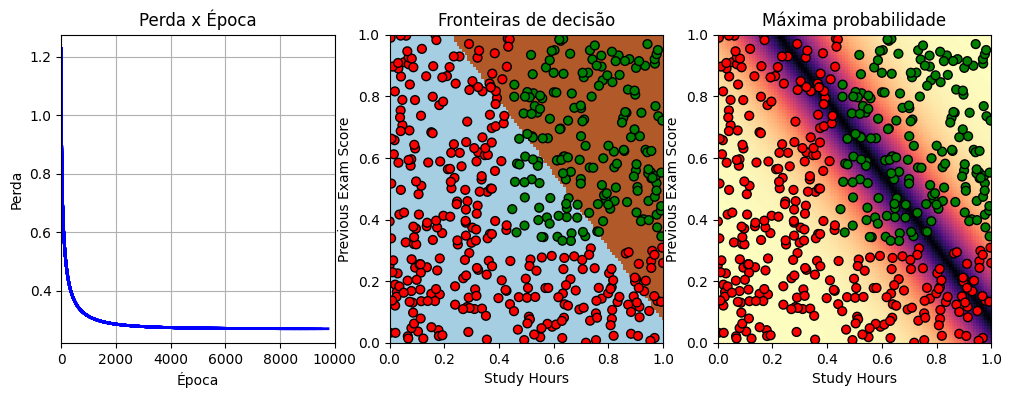

In [26]:
lr = 0.15

optimizer = torch.optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()


b_epoch = 10000

my_plot = MyPlotter(model, x_tensor.numpy(), y_tensor.numpy(), b_epoch)

losses = []
for i in range(b_epoch):

    output = model(x_tensor)

    loss = criterion(output, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.data.item())

    my_plot.on_epoch_end(i, {'loss': loss.data.item()});
    final_loss = loss.data.item()

print('final loss:', final_loss)

Qual é o shape da matriz de entrada na rede?

Shape da entrada: 1000, 784

Qual é o shape da saída da rede?

Shape da saída: 1000, 10

Qual é o número total de parâmetros da rede, incluindo o bias?

numero de parâmetros:	7.850




